# Image Classification (CNN - keras)

In [ ]:
# try the process of implementing CNN with Keras to classify images 
# 1. import useful packages 
# 2. load the data before visualize and preprocess it 
# 3. try a simplt CNN moodel and then evaluate its performances 
# 4. use techniques such as data augmentation, learning rate decay and dropout to increase our model's accuracy 


## with applications to Garbage Sorting 

### import packages 

In [15]:
import numpy as np  # linear algebra 
import pandas as pd # data processing 
import os 

In [63]:
import matplotlib.pyplot as plt
import cv2  # image processing package
# keras for model
from tensorflow import keras
import tensorflow
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.models import Sequential
from sklearn.utils import shuffle

import random


In [58]:
from importlib.metadata import version
version('keras')

'2.4.3'

In [27]:
# this is where all the images are stored
# users need to change the file path here 
# under this file path, we have four folders, each will have a category for garbage sorting 
# put images under corresponding folder 
train_dir = "E:/Python Proj/You-are-Pythonista-master/PracticeProject/GarbageClassification/Dudunwangu"


In [28]:
# define how many classes we have 
classes = ['dry', 'wet', 'hazardous', 'recycle']
len(classes)
clas = os.listdir(train_dir)
clas

['dry', 'harmful', 'recycle', 'residual']

In [73]:
one_from_each = []
titles = []
classes = os.listdir(train_dir)
n_classes = len(classes)
for x in classes:
    unique_img_dir = train_dir + '/' + x
    temp_directory = os.listdir(unique_img_dir)
    temp_img = unique_img_dir + '/' + temp_directory[random.randint(1,10)]
    image = cv2.imread(temp_img)
    #image = np.array(image)

In [74]:
image.shape

(340, 340, 3)

### read image and visualize some here 


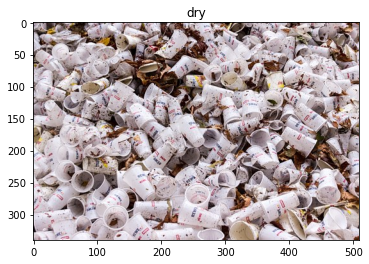

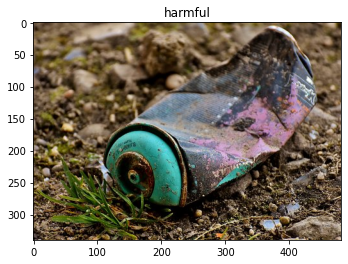

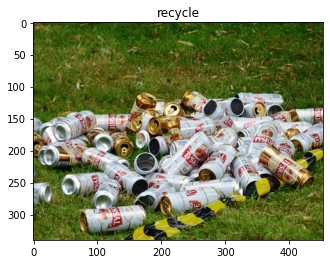

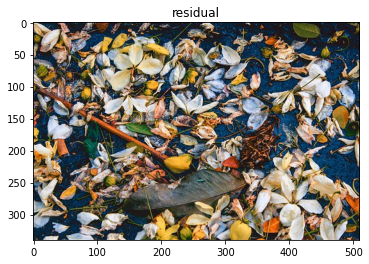

In [87]:
# read image and visualize some here 
one_from_each = []
titles = []
classes = os.listdir(train_dir)
n_classes = len(classes)
for x in classes:
    unique_img_dir = train_dir + '/' + x
    temp_directory = os.listdir(unique_img_dir)
    temp_img = unique_img_dir + '/' + temp_directory[random.randint(1,10)]
    image = cv2.imread(temp_img)
    image = np.array(image)
    image = image.astype('float32')/255.0
    one_from_each.append(image)
    titles.append(x)
    
for i in range(4):
    imageshow = one_from_each[i]
    plt.imshow(imageshow[:,:,::-1])
    plt.title(titles[i])
    plt.show()

In [54]:
# define labels 
print(classes)
labels_dict = {0:classes[0],
               1:classes[1],
               2:classes[2],
               3:classes[3]
               }

['dry', 'harmful', 'recycle', 'residual']


In [65]:
labels_dict[0]

'dry'

### load data 

In [88]:
# define a load data function 
# to process it for modeling 

def load_data(directory):
    size = 150,150
    images = []
    labels = []
    
    for folder in os.listdir(directory):
        print("Loading images from : ",folder, ": ", end="")
        for file in os.listdir(directory + "/" + folder):
            img_path = directory + "/" + folder + "/" + file
            curr_img = cv2.imread(img_path)
            curr_img = cv2.resize(curr_img, size)
            images.append(curr_img)
            if folder == labels_dict[0]:
                current_label = 0
            elif folder == labels_dict[1]:
                current_label = 1
            elif folder == labels_dict[2]:
                current_label = 2
            elif folder == labels_dict[3]:
                current_label = 3
         
            labels.append(current_label)
        print("completed")
    
    images, labels = shuffle(images, labels)
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = np.array(labels)
    labels = tensorflow.keras.utils.to_categorical(labels, n_classes)
    
    return images, labels

In [89]:
X_train, Y_train = load_data(train_dir)

Loading images from :  dry : completed
Loading images from :  harmful : completed
Loading images from :  recycle : completed
Loading images from :  residual : completed


### CNN Model

In [77]:
# modeling 
# using CNN 
# Convolutional Neural Network  

model = Sequential()

model.add(Conv2D(32, kernel_size =[5,5], strides = 2, activation = 'relu', input_shape = (150,150,3)))
model.add(MaxPool2D(pool_size = [2,2], strides = 2))
model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = "relu"))
model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = "relu"))
model.add(MaxPool2D(pool_size = [2,2], strides = 2))
model.add(Conv2D(128, kernel_size = [3,3], activation = "relu"))
model.add(Conv2D(128, kernel_size = [3,3], activation = "relu"))
model.add(MaxPool2D(pool_size = [2,2], strides = 2))
model.add(Conv2D(256, kernel_size = [3,3], activation = "relu"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(n_classes, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 36, 36, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 36, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       1

### Validation

In [91]:
# model validation
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model_hist =  model.fit(X_train, Y_train, epochs = 90, validation_split = 0.1, batch_size = 32)

Epoch 1/90
4/4 [==============================] - 5s 725ms/step - loss: 0.9644 - accuracy: 0.6397 - val_loss: 0.8597 - val_accuracy: 0.6429
Epoch 2/90
4/4 [==============================] - 1s 350ms/step - loss: 1.0102 - accuracy: 0.5692 - val_loss: 0.8801 - val_accuracy: 0.7143
Epoch 3/90
4/4 [==============================] - 1s 350ms/step - loss: 0.7583 - accuracy: 0.7748 - val_loss: 0.6637 - val_accuracy: 0.7857
Epoch 4/90
4/4 [==============================] - 1s 361ms/step - loss: 0.8441 - accuracy: 0.6748 - val_loss: 1.0682 - val_accuracy: 0.5714
Epoch 5/90
4/4 [==============================] - 1s 327ms/step - loss: 0.6181 - accuracy: 0.7692 - val_loss: 0.9825 - val_accuracy: 0.7143
Epoch 6/90
4/4 [==============================] - 1s 359ms/step - loss: 0.4889 - accuracy: 0.7947 - val_loss: 0.8186 - val_accuracy: 0.7143
Epoch 7/90
4/4 [==============================] - 1s 374ms/step - loss: 0.4957 - accuracy: 0.7881 - val_loss: 1.0205 - val_accuracy: 0.6429
Epoch 8/90
4/4 [====

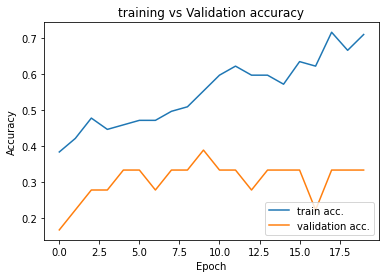

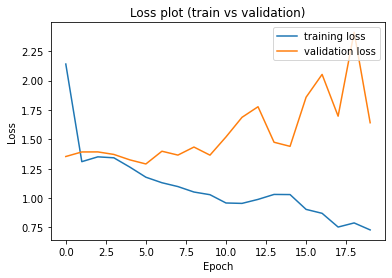

In [90]:
# plot the accuracy 
plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title("training vs Validation accuracy")
plt.legend(['train acc.','validation acc.'], loc = 'lower right')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.title("Loss plot (train vs validation)")
plt.legend(['training loss','validation loss'], loc = 'upper right')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


### Testing 

In [85]:
# test data
# put model on test data to check results 

# get test data 
# users need to change to your path 
test_dir = "E:/Python Proj/You-are-Pythonista-master/PracticeProject/GarbageClassification/Test"

X_test, Y_test = load_data(test_dir)

Loading images from :  dry : completed
Loading images from :  harmful : completed
Loading images from :  recycle : completed
Loading images from :  residual : completed


In [86]:
# get accuracy on test data 
metrics = model.evaluate(X_test, Y_test)
print("Model metrics = ",model.metrics_names)
print("Testing Accuracy = ", metrics[1])

2/2 [==============================] - 0s 21ms/step - loss: 0.5965 - accuracy: 0.8500
Model metrics =  ['loss', 'accuracy']
Testing Accuracy =  0.8500000238418579
